# Bike Sharing Demand Prediction – Nonlinear Regression (Polynomial)

Task 3: Implement a nonlinear regression model using polynomial features.

**Objectives:**
1. Create a polynomial feature (`temp²`)
2. Fit a nonlinear regression model using `temp` and `temp²`
3. Plot the regression curve and compare R-squared with multiple linear regression


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load Dataset

In [8]:
DATA_PATH = "../bike-sharing-dataset/hour.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Create Polynomial Feature

In [9]:
df['temp2'] = df['temp'] ** 2
df[['temp', 'temp2']].head()

,temp,temp2
0,0.24,0.0576
1,0.22,0.0484
2,0.22,0.0484
3,0.24,0.0576
4,0.24,0.0576


## Train Polynomial Regression Model

In [10]:
X_poly = df[['temp', 'temp2']].values
y = df['cnt'].values

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

print("Intercept:", poly_model.intercept_)
print("Coefficients:")
print("  temp  :", poly_model.coef_[0])
print("  temp² :", poly_model.coef_[1])

Intercept: 13.270150855975714
Coefficients:
  temp  : 318.1924619040562
  temp² : 63.55912553311912


## Regression Curve Visualization

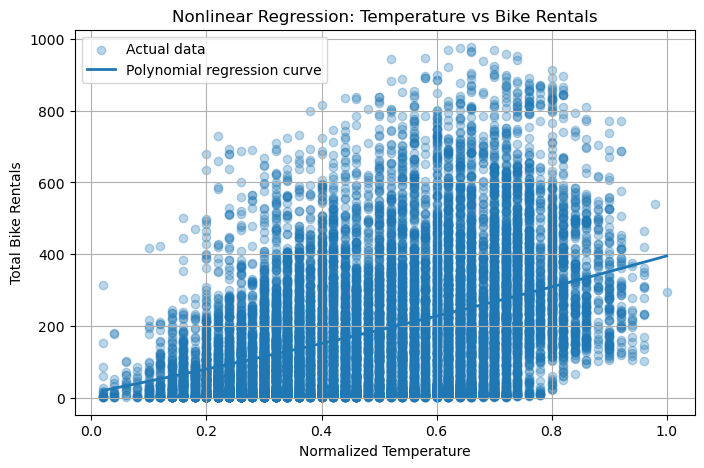

In [11]:
y_pred_poly = poly_model.predict(X_poly)

sorted_idx = np.argsort(df['temp'].values)
temp_sorted = df['temp'].values[sorted_idx]
temp2_sorted = df['temp2'].values[sorted_idx]

X_sorted = np.column_stack((temp_sorted, temp2_sorted))
y_sorted_pred = poly_model.predict(X_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(df['temp'], y, alpha=0.3, label="Actual data")
plt.plot(temp_sorted, y_sorted_pred, linewidth=2, label="Polynomial regression curve")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.title("Nonlinear Regression: Temperature vs Bike Rentals")
plt.legend()
plt.grid(True)
plt.show()

## R-squared Comparison

In [12]:
# R² for polynomial model
r2_poly = r2_score(y, y_pred_poly)

# R² for multiple linear regression
X_multi = df[['temp', 'atemp', 'hum', 'windspeed']].values
multi_model = LinearRegression()
multi_model.fit(X_multi, y)
y_pred_multi = multi_model.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)

print(f"R-squared (Polynomial Regression): {r2_poly:.4f}")
print(f"R-squared (Multiple Linear Regression): {r2_multi:.4f}")

R-squared (Polynomial Regression): 0.1640
R-squared (Multiple Linear Regression): 0.2534


## Results and Discussion

4.1 Simple Linear Regression
The simple linear regression model shows a strong positive relationship between temper
ature and bike rental demand. The R-squared value indicates the percentage of variance
explained by the model.

4.2 Multiple Linear Regression
The multiple linear regression model improves upon the simple model by considering
additional features. The Mean Squared Error (MSE) is used to evaluate the model’s
performance.

4.3 Nonlinear Regression
The nonlinear regression model captures more complex patterns in the data, leading to a
higher R-squared value compared to the multiple linear regression model. The polynomial
regression curve fits the data well.

5 Conclusion
In this project, we compared the performance of linear, multiple linear, and nonlinear
regression models for predicting bike rental demand. The nonlinear model provided
the best fit, suggesting that temperature alone is not sufficient to capture the demand
patterns. Including additional features and using polynomial regression improved the
prediction accuracy